In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [2]:
def test_function(r):
    r = np.asarray(r)
    scalar_input = False
    if r.ndim == 0:
        r = r[None]
        scalar_input = True
    rho = np.zeros(np.shape(r))
    rho[ r > 10 ] = r*r
    rho[ r <= 10] = r
            
    if scalar_input:
        return np.squeeze(rho)
    else:
        return rho

In [3]:
r = np.array([1.0,5.0,10.0,12.0])


In [4]:
test_function(1000.0)

array(1000000.0)

In [5]:
quad(test_function, 0.0, 24.0)

(4324.666666666666, 1.997150138777215e-05)

In [6]:
func = lambda x : quad(test_function,0.0, x)

In [7]:
#rom sympy import *

In [8]:
#r = Symbol('r')
#r_s = Symbol('r_s')dm_density_profiles.py:132: RuntimeWarning: divide by zero encountered in divide

#gamma = Symbol('gamma')
#alpha = Symbol('alpha')
#beta  = Symbol('beta')
#rho_s = Symbol('rho_s')



In [9]:
#rho = rho_s / ((r/r_s)**gamma * (1 + (r/r_s)**alpha)**((beta-gamma)/alpha))

In [10]:
#first_dir = diff(rho,r)

In [11]:
#first_dir

In [12]:
#first_dir.simplify()

In [13]:
#f = -(beta*(r/r_s)**alpha + gamma)/((r/r_s)**alpha + 1) * (1/r)
#diff(f,r).simplify()

In [14]:
import dm_density_profiles as dmd
import cgs as cgs

using cgs py


In [15]:
NFW = dmd.general_dm_profile('NFW')

In [16]:
NFW.set_params(profile_shape_params=[1.0,3.0,1.0])

In [17]:
NFW.set_params(M_vir = 1.0E12 * cgs.Msun, r_vir = 240.0 * cgs.kpc)
NFW.set_params(r_decay = 0.1*NFW.r_vir, r_s = (1.0/12.0)*NFW.r_vir)

In [18]:
NFW.density(1000.0*cgs.pc)

array(7.440756927614033e-24)

In [19]:
r = np.linspace(0.001,500.0,10000.0)*cgs.kpc

In [20]:
rho = NFW.density(r)

In [21]:
drho_dr = NFW.first_derivative(r)

In [22]:
drho_drdr = NFW.second_derivative(r)

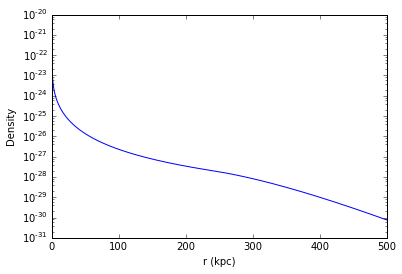

In [23]:
plt.plot(r/cgs.kpc,rho)
plt.semilogy()
plt.xlabel('r (kpc)')
plt.ylabel('Density')

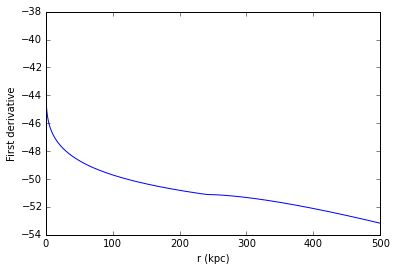

In [24]:
plt.plot(r/cgs.kpc, np.log10(-NFW.first_derivative(r)))
plt.xlabel('r (kpc)')
plt.ylabel(r'First derivative')

dm_density_profiles.py:143: RuntimeWarning: divide by zero encountered in divide
  rho[r <= self.r_vir] = self.rho_s / ( c**gamma * (1.0 + c**alpha)**((beta-gamma)/alpha) )


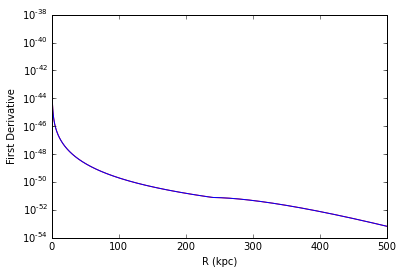

In [25]:
plt.plot(r/cgs.kpc, -derivative(NFW.density,r,dx=1.0*cgs.pc), color = 'red')
plt.plot(r/cgs.kpc, -NFW.first_derivative(r), color='blue')

plt.semilogy()
plt.xlabel('R (kpc)')
plt.ylabel('First Derivative')

[]

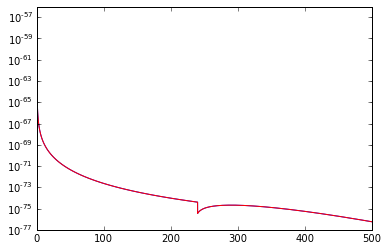

In [26]:
plt.plot(r/cgs.kpc, NFW.second_derivative(r))
plt.plot(r/cgs.kpc, derivative(NFW.first_derivative,r,dx=1.0*cgs.pc), color = 'red')

plt.semilogy()

[]

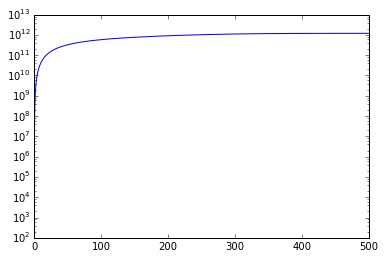

In [27]:
plt.plot(r/cgs.kpc, NFW.cumulative_mass(r)/cgs.Msun)
plt.semilogy()

In [28]:
print NFW.r_vir/cgs.kpc
print NFW.M_vir/cgs.Msun

print NFW.cumulative_mass(NFW.r_vir)/(NFW.M_vir)
print NFW.cumulative_mass(500*cgs.kpc)/(NFW.M_vir)

240.0
1e+12
1.0
1.19533180003


In [29]:
NFW.epsilon

7.153846153846153

In [30]:
10 - 37/13.0

7.153846153846153

In [31]:
np.pi * 3.0

9.42477796076938

In [32]:
rho_s = 12**3 * NFW.M_vir / (4.0 * np.pi * NFW.r_vir**3 * (np.log(1.0+12.0) - 12.0/(13.0)))

In [33]:
print rho_s
print NFW.rho_s

4.10171725635e-25
4.10171725635e-25


In [34]:
pot_anal = -4.0*np.pi*cgs.G*NFW.rho_s*NFW.r_s**2 * np.log10(1.0 + r / NFW.r_s) / (r/NFW.r_s)

/home/emerick/anaconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
dm_density_profiles.py:154: RuntimeWarning: invalid value encountered in multiply
  np.exp(-(r[r>self.r_vir]-self.r_vir)/self.r_decay)


nan
0.0


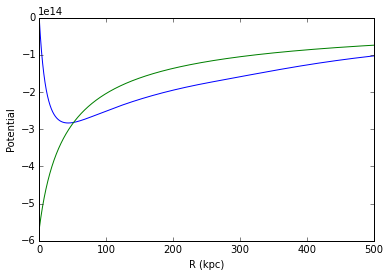

In [35]:
pot = NFW.potential(r)
plt.plot(r/cgs.kpc, pot)
plt.plot(r/cgs.kpc, pot_anal)
plt.xlabel('R (kpc)')
plt.ylabel('Potential')

print NFW.first_derivative(np.inf)
print NFW.dPhi_dr(np.inf)

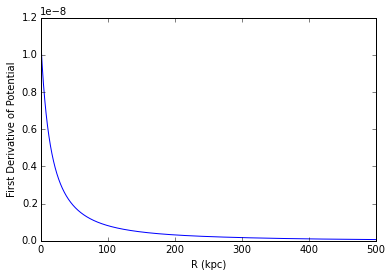

In [36]:
p = NFW.dPhi_dr(r)
plt.plot(r/cgs.kpc, p)
plt.xlabel('R (kpc)')
plt.ylabel('First Derivative of Potential')

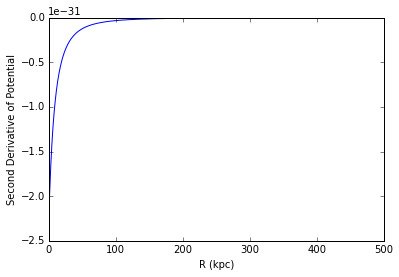

In [37]:
p = NFW.d2Phi_dr2(r)
plt.plot(r/cgs.kpc, p)
plt.xlabel('R (kpc)')
plt.ylabel('Second Derivative of Potential')